In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assignment 03

## 1. Bias-Variance Trade-off

### 1.1.
Only from looking at the plotted data, which degree of a polynomial would be your best guess that would fit the data without over- or underfitting it? Why?



Looking at the data my guess for a polynomial fit would be fit of degree $4$. The reason for that is that there is no sign change of the function, looking at the left, and the right end of the shown plot. Therefore, the degree of the polynomial should be even. In particular, in the middle of the plot we have a characteristic $V$-shape with. Two extrema in the middle. Having $4$ extrema, one needs a polynomial of degree at least $4$.

### 1.2.
Predict how the bias and variance (high / low) and fit (under / over) would be for:
* A constant model (i.e. a horizontal line)
* A linear model
* A polynomial model of degree 10


Answers
* For a constant model the bias is \textit{high}, the variance is \textit{low} and the fit is \textit{under}.
* For a linear model the bias is \textit{high}, the variance is \textit{low} and the fit is \textit{under}.
* For a polynomial model of degree 10 the bias is \textit{low}, the variance is \textit{high} and the fit is \textit{over}.

### 1.3.
Use `numpy` to load the two splits of the dataset

In [29]:
data_train = np.genfromtxt("data_train.csv", delimiter=',')# TODO: Load CSV
x_train = data_train[:,0] # TODO: Take input slice from data_train
y_train = data_train[:,1]  # TODO: Take target slice from data_train
print(x_train)

data_test = np.genfromtxt("data_test.csv", delimiter=',')  # TODO: Load CSV
x_test = data_test[:,0]  # TODO: Take input slice from data_test
y_test = data_test[:,1]  # TODO: Take target slice from data_test

[0.57414415 0.74524188 1.17441646 1.35265385 1.74796683 1.81365892
 2.17114597 2.20854853 2.80500454 2.8442453  3.4097416  3.72727274
 3.92631116 4.14215794 4.30362266 4.46256035 4.86084307 5.34507845
 5.35663287 5.74993393 5.85722826 5.88003787 6.25910139 6.87650201
 6.99247185 7.07626694 7.22213903 7.28704556 7.46553824 7.747306  ]


and use `matplotlib` to recreate the plot from Figure 1.

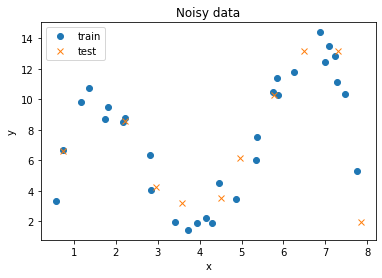

In [33]:
fig, ax = plt.subplots()
# TODO: Plot the training data
# TODO: Plot the testing data
# Don't forget to annotate your plots!
# (axes labels, title, legend, units, etc.)
ax.plot(x_train, y_train, 'o', label = 'train')
ax.plot(x_test, y_test, 'x', label = 'test')
ax.set_title("Noisy data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### 1.4. 
Using the `sklearn.linear_model.LinearRegression` class, fit a linear model to the data in the `data_train.csv` file.

Compute the MSE error for the data in `data_test.csv` and plot the predicted line together with the original data.

In [40]:
model = LinearRegression() # TODO: Create a linear regression model
model.fit(x_train.reshape(-1, 1), y_train)  # TODO: Fit the model to the training data

pred = model.predict(x_test.reshape(-1, 1))  # TODO: Predict the testing data

# TODO: Calculate the mean squared error between the predictions and the
# testing data targets

def mean_squared_error(y_true, y_pred):
    """
    Calculate Mean Squared Error (MSE).
    
    Parameters:
    y_true (array-like): True values
    y_pred (array-like): Predicted values
    
    Returns:
    float: Mean Squared Error
    """
    # Calculate the squared differences
    squared_diff = (y_true - y_pred) ** 2
    # Return the mean of the squared differences
    mse = squared_diff.mean()
    return mse


mse = mean_squared_error(y_test, pred)

print(f"Mean Squared Error: {mse}")

LinearRegression()
Mean Squared Error: 14.78091268758106


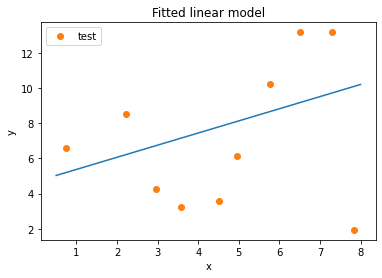

In [44]:
# Generate points to plot the curve of the model
full_x = np.linspace(0.5, 8, 100)[:, np.newaxis]
# TODO: Predict the output values for the curve
y_curve = model.predict(full_x)

fig, ax = plt.subplots()
# TODO: Plot the training data
# TODO: Plot the testing data
# TODO: Plot the model curve
...
ax.plot(full_x, y_curve)
ax.plot(x_test, y_test, 'o', label='test')
ax.set_title("Fitted linear model")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### 1.5.
Create a class that can fit a polynomial model of an arbitrary degree. For example `m = PolynomialModel(degree=23)`.

Include a `fit(x_train, y_train)` method for fitting some training data and a `predict(x)` method for performing inference for the values of unseen data.

**Hint:** You can use `sklearn.linear_model.LinearRegression` and
`sklearn.preprocessing.PolynomialFeatures` together to define non-linear models by combining a linear model with basis functions.

In [47]:
class PolynomialModel:
    """" Class for polynomial regression.
    
    This class fits a polynomial regression model to a given
    training dataset by using a linear model combined with a
    polynomial feature transformation (basis function).
    """

    def __init__(
            self,
            degree: int
    ) -> None:
        """Constructor.
        
        Parameters:
            degree : int
                The degree of the polynomial model.
        """

        # TODO: Implement constructor
        # TODO: Create polynomial feature transformer
        self.degree = degree
        self.poly = PolynomialFeatures(degree)
        self.model = LinearRegression()
        ##poly_features = self.poly.fit_transform(x.reshape(-1, 1))
    
    def fit(
            self,
            x_train: np.ndarray,
            y_train: np.ndarray
    ) -> "PolynomialModel":
        """Fit the polynomial model to the training data.

        Parameters:
            x_train : np.ndarray[d, f]
                The input features of the training data witn d samples
                and f features.
            y_train : np.ndarray[d]
                The target values of the training data with d samples.
        
        Returns:
            self : PolynomialModel
                The fitted model.
        """


        # Transform the input features into polynomial features
        x_poly = self.poly.fit_transform(x_train.reshape(-1, 1))
        
        # Fit the linear regression model to the transformed features and target values
        self.model.fit(x_poly, y_train)

        return self

    def predict(
            self,
            x: np.ndarray
    ) -> np.ndarray:
        """Predict the target values for the given input features.

        Args:
            x: np.ndarray[d, f]
                The input features to predict the target values for with
                d samples and f features.

        Returns:
            pred: np.ndarray[d]
                The predicted target values with d samples.
        """
        
        # Transform the input features into polynomial features
        x_poly = self.poly.transform(x.reshape(-1, 1))
        
        # Predict the target values using the fitted model
        pred = self.model.predict(x_poly)
    
        return pred

Using your class, fit models with $\mathit{degrees} \in \{0, 1, 2, 3, 4, 5, 20\}$ and plot the fitted curves along with the original data.

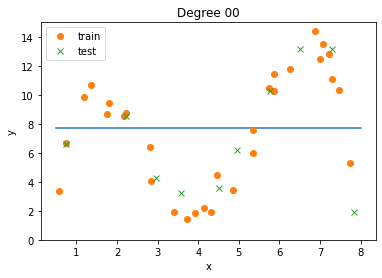

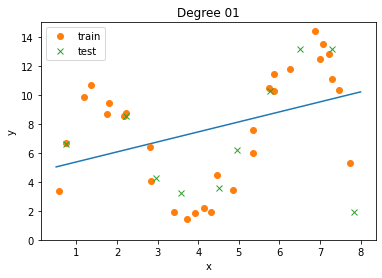

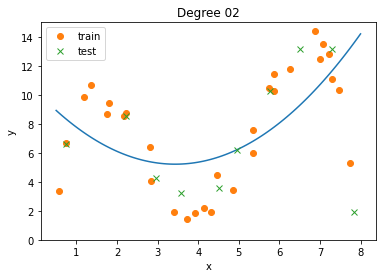

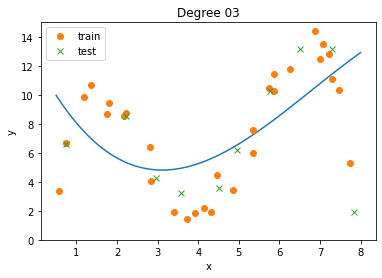

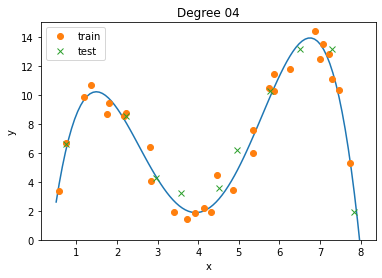

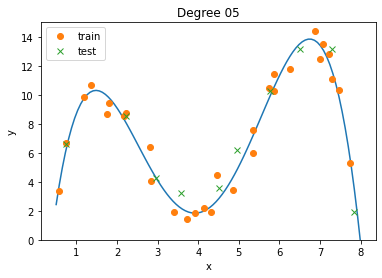

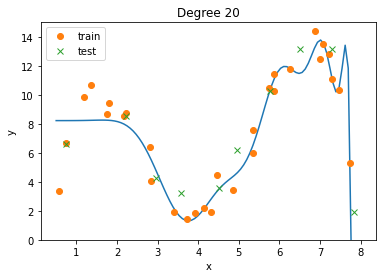

In [48]:
# TODO: Create a PolynomialModel object for each degree
models = {d: PolynomialModel(d) for d in [0, 1, 2, 3, 4, 5, 20]}

for d, model in models.items():
    fig, ax = plt.subplots()
    # Plot the training and test data
    # Fit a model to the training data
    # Generate points to plot the curve of the model
    model.fit(x_train,y_train)
    full_x = np.linspace(0.5, 8, 100)[:, np.newaxis]
    y_curve = model.predict(full_x)
    ax.plot(full_x, y_curve)


    # TODO: Predict on the x_full values to generate the model's curve
    # TODO: Plot the curve
    ...
    ax.plot(x_train, y_train, 'o', label = 'train')
    ax.plot(x_test, y_test, 'x', label = 'test')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Degree {d:02d}")
    ax.set_ylim(0, 15)
    ax.legend()

### 1.6.

Create a function `measure_bias_var_mse(model, x_train, y_train, x_test, y_test, n)` that _estimates_ the bias, variance and, mean square error of different models.

In [56]:
def sample_with_replacement(
        x: np.ndarray,
        y: np.ndarray
    ):
    """Auxiliary function to sample with replacement.

    Parameters:
        x : np.ndarray[d, f]
            A dataset with d points and f features.

        y : np.ndarray[d]
            Targets corresponding to the inputs of the dataset.
    
    Returns:
        x_sampled : np.ndarray[d, f]
            A sampled dataset with d points and f features.

        y_sampled : np.ndarray[d]
            Targets corresponding to the inputs of the sampled dataset.
    """

    # TODO: Implement the sampling with replacement
    d = x.shape[0]
    
    # Generate random indices for sampling with replacement
    sample_idx = np.random.choice(d, size=d, replace=True)

    return x[sample_idx], y[sample_idx]

In [62]:
def measure_bias_var_mse(
    model,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
    n: int = 200,
):
    """Measures the bias, variance and MSE of a model.

    Parameters:
        model: Any
            A model object with fit() and predict() methods.

        x_train: np.ndarray[d, f] or np.ndarray[d]
            A training dataset with d points and f features to be sampled
            with replacement to measure the bias-variance.

        y_train: np.ndarray[d]
            Targets corresponding to the inputs of the training dataset.

        x_test : np.ndarray[d_test, f] or np.ndarray[d_test]
            The test dataset for computing the average loss, bias, and variance.

        y_test : np.ndarray[d_test]
            Targetscorresponding to the inputs of the test dataset.

        n: int (Default=200)
            Number of sampling rounds to measure the bias-varias.
            Each sampled dataset has the same size as the original training set.
    
    Returns:
        avg_bias: float
            The average bias over the test dataset.
        avg_var: float
            The average variance over the test dataset.
        mse: float
            The average expected loss over the test dataset.
    """

    # Array for storing the predictions of each model
    all_pred = np.zeros((n, y_test.shape[0]), dtype=np.float64)

    # sklearn expects 2D inputs
    if x_train.ndim == 1:
        x_train = x_train[:, np.newaxis]
    if x_test.ndim == 1:
        x_test = x_test[:, np.newaxis]

    # Bootstrap sampling to generate n models
    for i in range(n):
        # Sample dataset with replacement
        x_boot, y_boot = sample_with_replacement(x_train, y_train)

        # Fit the model to the sampled dataset
        model.fit(x_boot, y_boot)
         # Predict on the test set and store the all_pred array
        all_pred[i, :] = model.predict(x_test)

    # Calculate the expected prediction (mean prediction across all models)
    mean_pred = np.mean(all_pred, axis=0)

    # Calculate bias: average squared difference between the mean prediction and the true values
    bias = np.mean((mean_pred - y_test) ** 2)

    # Calculate variance: average variance of the predictions across all models
    var = np.mean(np.sum((mean_pred - all_pred) ** 2, axis=0)) / n

    # Calculate MSE: average squared difference between the predictions and the true values
    n_models = all_pred.shape[0]  # Number of models (bootstraps)
    n_test_points = all_pred.shape[1]  # Number of test data points

    # Calculate the squared error for each model and each test point
    squared_errors = (all_pred - y_test) ** 2
    
    # Compute the MSE by averaging the squared errors over all models and test points
    mse = np.sum(squared_errors) / (n_models * n_test_points)
    return bias, var, mse

### 1.7
Using your function for estimating the MSE, bias and variance, compute them for models with $\mathit{degrees} \in \{0,\, 1,\, \dots,\, 10\}$.

In [68]:
# TODO: Create a PolynomialModel object for each degree
models = {d: PolynomialModel(d) for d in range(11)}

# TODO: Measure the bias, variance, and MSE for each model
results = {d: measure_bias_var_mse(model, x_train, y_train, x_test, y_test, n = 200) for d, model in models.items()}

Generate a plot of  the MSE, bias and variance, where the $x$ axis represents the degrees of the polynomial model, and the $y$ axis are the estimated metrics.

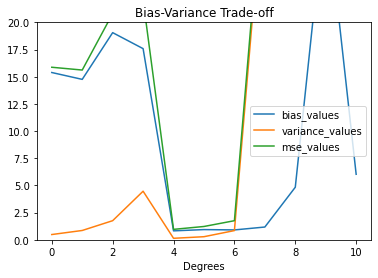

In [69]:
fig, ax = plt.subplots()
    
# TODO: Plot the Bias
# TODO: Plot the Variance
# TODO: Plot the MSE
degrees = list(results.keys())
bias_values = [result[0] for result in results.values()]
variance_values = [result[1] for result in results.values()]
mse_values = [result[2] for result in results.values()]

ax.plot(degrees, bias_values, label = "bias_values")
ax.plot(degrees, variance_values, label = "variance_values")
ax.plot(degrees, mse_values, label = "mse_values")
ax.set_xlabel("Degrees")
ax.set_title(f"Bias-Variance Trade-off")
ax.set_ylim(0, 20)
ax.legend()

Do the computed values and plot match your predictions from question 1.2.?

Yes they exactly match my expectation from 1.2! The first best polynomial is of degree 4, and as we guessed correctly a constant or linear model leads to a high bias, a high mean squared error, but a low variance.